<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<b>

<div class="alert alert-block alert-info">
<b>STRATOSPHERIC OZONE - EXERCISE SOLUTION</b></div>

<hr>

# Metop-A, -B, -C GOME-2 Level-2 - Arctic Ozone hole

This solution showcases the preparation of GOME-2 Level-2 data to analyse and animate the Arctic ozone hole in March 2020. 

* [Arctic Ozone hole 2020 - Workflow](#arctic_13)
  * [Load Metop-A/B/C GOME-2 Total Column Ozone Level-2 data and aggregate it](#load_13)
  * [Binning of Metop-A/B/C GOME-2 Level-2 data onto a regular two-dimensional grid](#gridding_13)
  * [*Optional: Loop through all the folders of Metop-A/B/C GOME-2 Level 2 data and create daily gridded netCDF files*](#optional_loop_13)
  * [Animate daily gridded Metop-A/B/C GOME-2 Level-2 Ozone information for each day in March 2020](#animate_13)


<br>

#### Load required libraries

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import glob

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

<br>

#### Load helper functions

In [3]:
%run ./functions.ipynb

<hr>

# <a id='arctic_13'></a>Arctic Ozone hole 2020 - Workflow

## <a id='load_13'></a>Load Metop-A/B/C GOME-2 Total Column Ozone Level-2 data and aggregate it

#### Load daily Metop-A/B/C GOME-2 Total Column Ozone Level-2 data as `xarray.DataArray`

Metop-A GOME-2 Level-2 data are disseminated in the `HDF5` format and are organised in five groups, internally:
* `META_DATA`
 * Product Metadata
* `GEOLOCATION`
 * Date & Time (all retrievals)
 * 4 Corner Coordinates & Centre of Ground Pixel
 * Solar, Line-of-Sight Zenith, and realtive Azimuth angles at TOA
 * Orbit information
* `TOTAL_COLUMNS`
 * Total and tropospheric column amounts of the various trace gases with corresponding (relative) errors
* `DETAILED_RESULTS`
 * Geophysical parameters (surface, cloud and aerosol values)
 * Vertical column, slant column, and AMF values with corresponding errors
 * Fittings diagnostics (chi-square, RMS, etc.)
 * Various subgroups for trace gas specific data (e.g. O<sub>3</sub>, NO<sub>2</sub>, SO<sub>2</sub>, etc.)
* `CLOUD_PROPERTIES`
 * Retrieve cloud properties


Relevant information is in the groups `GEOLOCATION`, `TOTAL_COLUMNS` and `CLOUD_PROPERTIES`. With the help of the function [load_l2_data_xr](./functions.ipynb#load_l2_data_xr), you can generate a `xarray.DataArray` object by using information stored in the groups of the data file. The data files for this workflow are in the data directory `/eodata/gome2/offline/2a/2020/09/`.

The function generates a `xarray.DataArray` from a given set of `HDF5` files and matches variable information with latitude and longitude information. The result is a `xarray.DataArray` with one dimension and `latitude` and `longitude` information as coordinates.

Let us first load the Ozone data for 1 March 2020 by using the following function kwargs:
> directory=**(directory_2a, folder_list_2a[0]**<br>
> internal_filepath=**'TOTAL_COLUMNS'** <br>
> parameter=**'O3'**<br>
> lat_path=**'GEOLOCATION/LatitudeCentre'**<br>
> lon_path=**'GEOLOCATION/LongitudeCentre'** <br>
> no_of_dims=**1** <br>
> paramname=**'O3'** <br>
> unit=**'DU'** <br>
> longname=**'Tropospheric column density of O3'**


As we want to load the Ozone data for each day in March 2020, you can already load all folders of the March folder in a list of folders. As data array, you can specify the first entry of the folder list.

In [11]:
directory_2a = './eodata/gome2/offline/2a/2020/03/'
folder_list_2a = glob.glob(directory_2a+'/*')
folder_list_2a.sort()

data_array_a = load_l2_data_xr(directory=folder_list_2a[0], 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_a

<xarray.DataArray 'O3' (ground_pixel: 211163)>
array([257.86655, 257.57175, 259.25836, ..., 255.99936, 250.84825,
       248.08517], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 78.54998 78.497986 ... -84.389786
    longitude  (ground_pixel) float32 198.78352 196.99515 ... 41.96278 38.35278
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

We repeat the same procedure as above for the GOME-2 Level-2 Ozone data files from the Metop-B satellite. Metop-B data files are in the folder directory `/eodata/gome2/offline/2b/2020/03/`.

In [16]:
directory_2b = './eodata/gome2/offline/2b/2020/03/'
folder_list_2b = glob.glob(directory_2b+'/*')
folder_list_2b.sort()

data_array_b = load_l2_data_xr(directory=folder_list_2b[0], 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_b

<xarray.DataArray 'O3' (ground_pixel: 209865)>
array([287.82648, 290.50812, 293.8047 , ..., 281.84668, 277.51248,
       274.35376], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.51396 75.468124 ... -86.194374
    longitude  (ground_pixel) float32 216.13277 214.70442 ... 19.135382
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

And the same procedure is repeated again for the GOME-2 Level-2 Ozone data files of Metop-C. The data files are in the folder directory `/eodata/gome2/offline/2c/2020/03/`.

In [18]:
directory_2c = './eodata/gome2/offline/2c/2020/03/'
folder_list_2c = glob.glob(directory_2c+'/*')
folder_list_2c.sort()

data_array_c = load_l2_data_xr(directory=folder_list_2c[0], 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_c

<xarray.DataArray 'O3' (ground_pixel: 421584)>
array([264.1289 , 265.22217, 267.3188 , ..., 276.74435, 278.68613,
       276.46472], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.5882 75.53899 ... -86.42801 -86.214874
    longitude  (ground_pixel) float32 203.5453 202.11206 ... 12.605233 8.287676
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

#### Load cloud fraction information

In the previous section, you loaded the GOME-2 Level-2 Ozone information from the three satellites Metop-A, Metop-B and Metop-C. 
The next step is to load the `CloudFraction` information, for the three satellites, Metop-A, Metop-B and Metop-C. You can use again the function [load_l2_data_xr](./functions.ipynb#load_l2_data_xr). As internal filepath and parameter, you can specify `CLOUD_PROPERTIES` and `CloudFraction` respectively.

You can make use of the defined folder paths above. The first step, is to load the `CloudFraction` information from 1 March 2020 from the Metop-A satellite.

In [19]:
cloud_fraction_a = load_l2_data_xr(directory=folder_list_2a[0],
                                   internal_filepath='CLOUD_PROPERTIES',
                                   parameter='CloudFraction', 
                                   lat_path='GEOLOCATION/LatitudeCentre', 
                                   lon_path='GEOLOCATION/LongitudeCentre', 
                                   no_of_dims=1, 
                                   paramname='CloudFraction',
                                   unit='-',
                                   longname='Cloud Fraction') 
cloud_fraction_a

<xarray.DataArray 'CloudFraction' (ground_pixel: 211163)>
array([0.9896364 , 0.8773051 , 0.9714895 , ..., 0.7652889 , 0.7581082 ,
       0.75459504], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 78.54998 78.497986 ... -84.389786
    longitude  (ground_pixel) float32 198.78352 196.99515 ... 41.96278 38.35278
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

The next step is to load the `CloudFraction` information for the data files from the Metop-B satellite.

In [20]:
cloud_fraction_b = load_l2_data_xr(folder_list_2b[0],
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre', 
                                    no_of_dims=1, 
                                    paramname='CloudFraction',
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_b

<xarray.DataArray 'CloudFraction' (ground_pixel: 209865)>
array([0.9883544 , 0.97632164, 0.9713981 , ..., 0.67418593, 0.7164886 ,
       0.75304663], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.51396 75.468124 ... -86.194374
    longitude  (ground_pixel) float32 216.13277 214.70442 ... 19.135382
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

And the final step is to repeat the same procedure for the data files from the Metop-C satellite.

In [21]:
cloud_fraction_c = load_l2_data_xr(folder_list_2c[0],
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre',
                                    no_of_dims=1, 
                                    paramname='CloudFraction', 
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_c

<xarray.DataArray 'CloudFraction' (ground_pixel: 421584)>
array([0.9966902 , 0.99062806, 0.9735477 , ..., 0.5965696 , 0.65774244,
       0.73912144], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.5882 75.53899 ... -86.42801 -86.214874
    longitude  (ground_pixel) float32 203.5453 202.11206 ... 12.605233 8.287676
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

<br>

#### Concatenate the data and cloud fraction information from the three satellites Metop-A, -B and -C

The next step is to concatenate (combine) the ground pixel information from the three satellite Metop-A, -B and -C. You can do this with the function `xr.concat()` and as concatenation dimension you specify `ground_pixel`.

Repeat the concatenation step also for the cloud fraction information.

In [22]:
data_abc = xr.concat([data_array_a, data_array_b, data_array_c], dim='ground_pixel')

cloud_fraction_abc = xr.concat([cloud_fraction_a, cloud_fraction_b, cloud_fraction_c], dim='ground_pixel')

<br>

As a result, you see that for 1 March 2020, there is a total of more than 840000 ground pixel information for GOME-2 Level-2 Ozone data.

In [23]:
data_abc, cloud_fraction_abc

(<xarray.DataArray 'O3' (ground_pixel: 842612)>
 array([257.86655, 257.57175, 259.25836, ..., 276.74435, 278.68613,
        276.46472], dtype=float32)
 Coordinates:
     latitude   (ground_pixel) float32 78.54998 78.497986 ... -86.214874
     longitude  (ground_pixel) float32 198.78352 196.99515 ... 12.605233 8.287676
 Dimensions without coordinates: ground_pixel
 Attributes:
     long_name:  Tropospheric column density of O3
     units:      DU,
 <xarray.DataArray 'CloudFraction' (ground_pixel: 842612)>
 array([0.9896364 , 0.8773051 , 0.9714895 , ..., 0.5965696 , 0.65774244,
        0.73912144], dtype=float32)
 Coordinates:
     latitude   (ground_pixel) float32 78.54998 78.497986 ... -86.214874
     longitude  (ground_pixel) float32 198.78352 196.99515 ... 12.605233 8.287676
 Dimensions without coordinates: ground_pixel
 Attributes:
     long_name:  Cloud Fraction
     units:      -)

<br>

#### Mask the data array based on the cloud fraction information

Now you can mask the Ozone data (`data_abc`) with the help of the `CloudFraction` information (`cloud_fraction_abc`) and the function [generate_masked_array](./functions.ipynb#generate_masked_array). You want to mask out all pixles with a cloud cover higher than 20% (> 0.2) and only keep pixels where the cloud cover is less than 20% (< 0.2).

The function takes the following kwargs:
> xarray=**data_abc**<br>
> mask=**cloud_fraction_abc**<br>
> threshold=**0.2**<br>
> operator=**'<'**<br>
> drop=**True**

You might want to set the `drop` kwarg to True. In this way, all the pixels that are masked out are dropped from the masked data array. You see, that by setting `drop=True`, the number of ground pixels decreases to less than 311000.

In [24]:
o3_abc_masked_cf = generate_masked_array(xarray=data_abc, 
                                         mask=cloud_fraction_abc, 
                                         threshold=0.2 , 
                                         operator='<', 
                                         drop=True)
o3_abc_masked_cf


<xarray.DataArray (ground_pixel: 310113)>
array([245.75412, 252.74994, 251.87749, ..., 286.38303, 283.42715,
       294.02832], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 79.58274 79.31044 ... -84.94449 -75.23061
    longitude  (ground_pixel) float32 154.61455 153.36398 ... 105.28646 64.44789
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

GOME-2 Level-2 data are disseminated on a 0 to 360 degrees longitude grid. Thus, the last step before the gridding process, is to reassign the longitude values to a grid ranging from -180 degrees to 180 degrees. You can do this with the xarray function `assign_coords()`.

In [25]:
o3_abc_masked = o3_abc_masked_cf.assign_coords(longitude=(((o3_abc_masked_cf.longitude + 180) % 360) - 180))
o3_abc_masked

<xarray.DataArray (ground_pixel: 310113)>
array([245.75412, 252.74994, 251.87749, ..., 286.38303, 283.42715,
       294.02832], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 79.58274 79.31044 ... -84.94449 -75.23061
    longitude  (ground_pixel) float32 154.61456 153.36398 ... 105.28647 64.44789
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

The `o3_abc_masked` object contains all the GOME-2 Level-2 Ozone ground pixel information, which you want to bring onto a regular-spaced two-dimensional latitude / longitude grid in the next step.

<br>

## <a id='gridding_13'></a>Binning of Metop-A/B/C GOME-2 Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `o3_abc_masked` array onto a regular two-dimensional grid. This process is called *binning*. As a preparation, you store the data values of `latitude`, `longitude` and `ozone` as variables x, y, z.

In [26]:
y = o3_abc_masked.latitude.data
x = o3_abc_masked.longitude.data
z = o3_abc_masked.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 1 x 1 degree.

In [27]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 310.64553833,          nan, ...,          nan,
                 nan,          nan],
       [328.90844727,          nan,          nan, ..., 318.09127808,
        318.21429443, 325.35507202],
       ...,
       [         nan, 263.71569824, 260.78924561, ..., 269.78436279,
        266.97744751, 259.27724609],
       [258.35064697, 258.95883179,          nan, ..., 263.24905396,
        265.84624227, 262.60594686],
       [260.45148399, 261.3119812 ,          nan, ...,          nan,
                 nan,          nan]])

Out of the binned information, you can create a `xarray.DataArray`, which gives you flexibility in further handling the regularly gridded Ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Ozone information

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [37]:
day = pd.to_datetime('2020-03-'+folder_list_2a[0][34:])
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': day,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': o3_abc_masked.long_name, 'units': o3_abc_masked.units},
                name='O3'
            )

xarray_abc

<xarray.DataArray 'O3' (latitude: 180, longitude: 360)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 310.64553833,          nan, ...,          nan,
                 nan,          nan],
       [328.90844727,          nan,          nan, ..., 318.09127808,
        318.21429443, 325.35507202],
       ...,
       [         nan, 263.71569824, 260.78924561, ..., 269.78436279,
        266.97744751, 259.27724609],
       [258.35064697, 258.95883179,          nan, ..., 263.24905396,
        265.84624227, 262.60594686],
       [260.45148399, 261.3119812 ,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    time       datetime64[ns] 2020-03-01
  * latitude   (latitude) float64 -85.87 -84.94 -84.02 ... 77.49 78.42 79.34
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<br>

#### Visualize the gridded Ozone information

Let us visualize the gridded Ozone information for 1 March 2020. You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh). As projection, you can use `ccrs.Orthographic` and set the latitude and longitude information to the Arctic. 

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Gridded level 3 data of tropospheric column density of Ozone for 1 March 2020'}>)

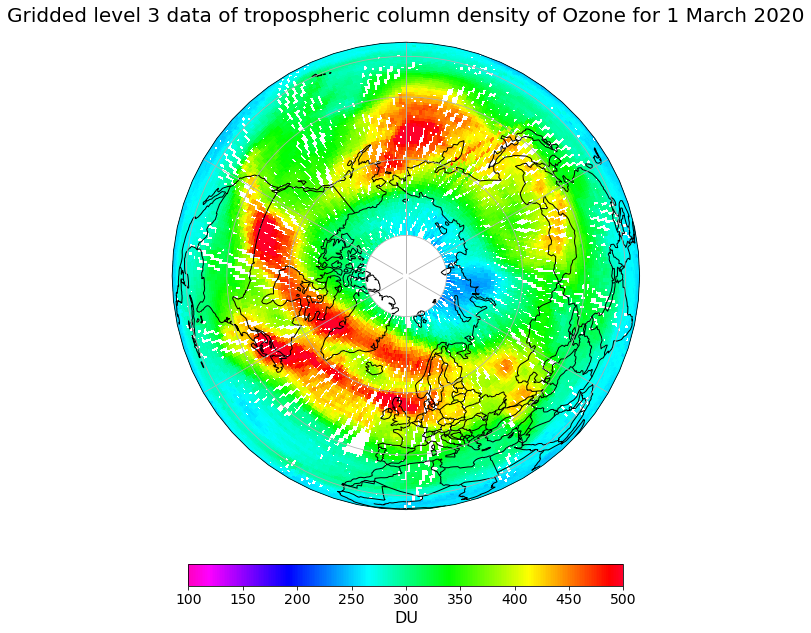

In [38]:
visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for 1 March 2020', 
                     vmin=100, 
                     vmax=500)

<br>

#### Regrid data onto a custom 1 x 1 degree regular grid with `xarray.groupby_bins`

There is one additional step required, in order to bring multiple daily files onto the same regular grid. Without this step, each gridded data set would have its own grid definition and it would be not possible to animate the daily files in a coherent way.

For this reason, the next step defines a custom 1 x 1 degree regular grid and regrids the Ozone information onto the custom grid. You have to specify the custom grid information for both, latitude and longitude information.
You can use xarray's function `groupby_bins()` to regrid the Ozone values onto the specified grid.

With xarray's function `to_netcdf()`, you can save the gridded Ozone information for 1 March 2020 as `netCDF` file.

In [39]:
lat_bins = np.arange(-90,90+(1/2),1)
lon_bins = np.arange(-180,180+(1/2), 1)

# define a label for each bin corresponding to the central latitude
lat_center = np.arange(-90+(1/2),90,1)
lon_center = np.arange(-180+(1/2),180,1)

# Bring Ozone values onto a regular latitude grid and create the average of multiple values per cell
tmp_regrid_lat = xarray_abc.groupby_bins('latitude', lat_bins, labels=lat_center).mean()
# Bring Ozone values onto a regular longitude grid
tmp_regrid = tmp_regrid_lat.groupby_bins('longitude', lon_bins, labels=lon_center).mean()

# Save the gridded Ozone data as netCDF data file
tmp_regrid.to_netcdf('./'+day.strftime('%Y-%m-%d')+'.nc')

<br>

## <a id='optional_loop_13'></a>*Optional: Loop through all the folders of Metop-A/B/C GOME-2 Level 2 data and create daily gridded netCDF files*

The aim is to animate the Ozone hole development during September 2020. For this reason, we combine the individual steps from above in a for loop and create for each day in March 2020 a daily file of regular gridded Ozone information.

The individual steps are the following:
* Load the Ozone information as `xarray.DataArray` for the three satellites Metop-A, -B and -C and concatenate the data arrays
* Load the cloud fraction information as `xarray.DataArray` for the three satellites Metop-A, -B and -C and concatenate the data arrays
* Create a masked data array by masking out all pixels with a cloud fraction higher than 20%
* Bring the Ozone information onto a regular 1 x 1 degree grid
* Regrid the gridded Ozone information onto a custom defined regular grid
* Save the daily gridded Ozone information as netCDF file


Note: the loop below takes a bit of time, as we go through many data files. For this reason, executing the loop is optional. The daily gridded Ozone information for each day in March 2020 are already available under `/eodata/gome2/offline/abc/03/`. Thus, you can continue with the next step.

In [ ]:
for day in range(1,len(folder_list_2c)+1):

    print(day)
    
    # Load Ozone information
    data_array_a = load_l2_data_xr(directory=folder_list_2a[day], 
                                 internal_filepath='TOTAL_COLUMNS', 
                                 parameter='O3', 
                                 lat_path='GEOLOCATION/LatitudeCentre', 
                                 lon_path='GEOLOCATION/LongitudeCentre', 
                                 no_of_dims=1, 
                                 paramname='O3',
                                 unit='DU',
                                 longname='Tropospheric column density of O3')

    
    data_array_b = load_l2_data_xr(directory=folder_list_2b[day], 
                                 internal_filepath='TOTAL_COLUMNS', 
                                 parameter='O3', 
                                 lat_path='GEOLOCATION/LatitudeCentre', 
                                 lon_path='GEOLOCATION/LongitudeCentre', 
                                 no_of_dims=1, 
                                 paramname='O3',
                                 unit='DU',
                                 longname='Tropospheric column density of O3')

    data_array_c = load_l2_data_xr(directory=folder_list_2c[day], 
                                 internal_filepath='TOTAL_COLUMNS', 
                                 parameter='O3', 
                                 lat_path='GEOLOCATION/LatitudeCentre', 
                                 lon_path='GEOLOCATION/LongitudeCentre', 
                                 no_of_dims=1, 
                                 paramname='O3',
                                 unit='DU',
                                 longname='Tropospheric column density of O3')
    
    data_array_abc = xr.concat([data_array_b, data_array_c], dim='ground_pixel')

    # Load cloud fraction information 
    cloud_fraction_a = load_l2_data_xr(directory=folder_list_2a[day],
                                     internal_filepath='CLOUD_PROPERTIES', 
                                     parameter='CloudFraction', 
                                     lat_path='GEOLOCATION/LatitudeCentre', 
                                     lon_path='GEOLOCATION/LongitudeCentre', 
                                     no_of_dims=1, 
                                     paramname='cloud_fraction', 
                                     unit='-', 
                                     longname='Cloud Fraction')

    cloud_fraction_b = load_l2_data_xr(directory=folder_list_2b[day],
                                     internal_filepath='CLOUD_PROPERTIES', 
                                     parameter='CloudFraction', 
                                     lat_path='GEOLOCATION/LatitudeCentre', 
                                     lon_path='GEOLOCATION/LongitudeCentre', 
                                     no_of_dims=1, 
                                     paramname='cloud_fraction', 
                                     unit='-', 
                                     longname='Cloud Fraction')

    cloud_fraction_c = load_l2_data_xr(directory=folder_list_2c[day],
                                     internal_filepath='CLOUD_PROPERTIES', 
                                     parameter='CloudFraction', 
                                     lat_path='GEOLOCATION/LatitudeCentre', 
                                     lon_path='GEOLOCATION/LongitudeCentre', 
                                     no_of_dims=1, 
                                     paramname='cloud_fraction', 
                                     unit='-', 
                                     longname='Cloud Fraction')
    cloud_fraction_abc = xr.concat([cloud_fraction_b, cloud_fraction_c], dim='ground_pixel')
    
    # Generate a masked data array by masking out the ground pixels with a cloud fraction of more than 20%
    o3_abc_masked = generate_masked_array(xarray=data_array_abc, 
                                            mask=cloud_fraction_abc, 
                                            threshold=0.2 , 
                                            operator='<', 
                                            drop=True)
    
    o3_abc_masked_coords = o3_abc_masked.assign_coords(longitude=(((o3_abc_masked.longitude + 180) % 360) - 180))
    
    # Binning of Ozone information onto a regular 1x1 degrees grid and organize the gridded information as a xarray.DataArray()
    y = o3_abc_masked_coords.latitude.data
    x = o3_abc_masked_coords.longitude.data
    z = o3_abc_masked_coords.data
        
    zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
    counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
    zi = zi / counts
    zi

    date = pd.to_datetime('2020-03-'+str(day))
    
    xarray_abc_new = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': date,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': o3_abc_masked.long_name, 'units': o3_abc_masked.units},
                name='O3'
            )

    # Regrid the gridded Ozone information onto a custom defined regular grid
    lat_bins = np.arange(-90,90+(1/2),1)
    lon_bins = np.arange(-180,180+(1/2), 1)

    lat_center = np.arange(-90+(1/2),90,1)
    lon_center = np.arange(-180+(1/2),180,1)

    tmp_regrid_lat = xarray_abc_new.groupby_bins('latitude', lat_bins, labels=lat_center).mean()

    tmp_regrid = tmp_regrid_lat.groupby_bins('longitude', lon_bins, labels=lon_center).mean()
    
    # Save the regridded Ozone information for each day as a netCDF file
    tmp_regrid.to_netcdf('./'+date.strftime('%Y-%m-%d')+'.nc')

<br>

## <a id='animate_13'></a>Animate daily gridded Metop-A/B/C GOME-2 Level-2 Ozone information for each day in March 2020

#### Open daily gridded Ozone files for March 2020 with `xarray.open_mfdataset`

Let us now open the generated daily gridded Ozone information for March 2020 and store them as one single `xarray.Dataset`. You can use xarray's function `open_mfdataset()`, which allows the generation of a `xarray.Dataset` on the basis of multiple netCDF files. You have to provide the function the dimension you want to concatenate the files on. In this case, you want to combine the files based on the `time` dimension.

In [4]:
o3_daily = xr.open_mfdataset('./eodata/gome2/offline/abc/03/*.nc', concat_dim='time', combine='nested')
o3_daily

<xarray.Dataset>
Dimensions:         (latitude_bins: 180, longitude_bins: 360, time: 31)
Coordinates:
  * longitude_bins  (longitude_bins) float64 -179.5 -178.5 ... 178.5 179.5
  * latitude_bins   (latitude_bins) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-03-31
Data variables:
    O3              (time, latitude_bins, longitude_bins) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

<br>

The next step is to load the Ozone variable from the `xarray.Dataset` above.

In [5]:
o3 = o3_daily.O3
o3

<xarray.DataArray 'O3' (time: 31, latitude_bins: 180, longitude_bins: 360)>
dask.array<concatenate, shape=(31, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude_bins  (longitude_bins) float64 -179.5 -178.5 ... 178.5 179.5
  * latitude_bins   (latitude_bins) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-03-31

<br>

#### Visualize `Ozone` with `pcolormesh`

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for 1 March 2020'}>)

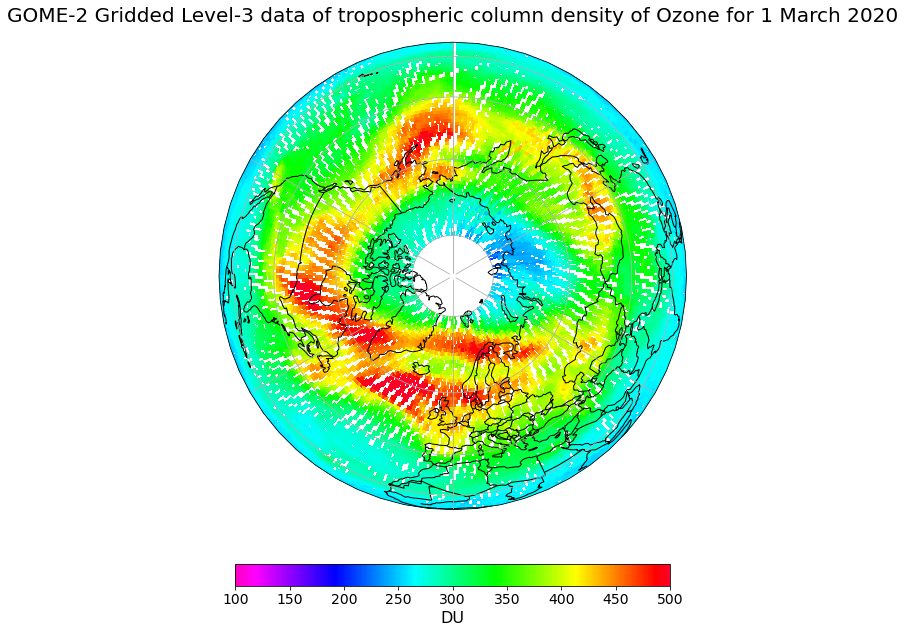

In [6]:
visualize_pcolormesh(data_array=o3[0,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for 1 March 2020', 
                     vmin=100, 
                     vmax=500)

<br>

#### Animate `Ozone` over the Arctic for March 2020

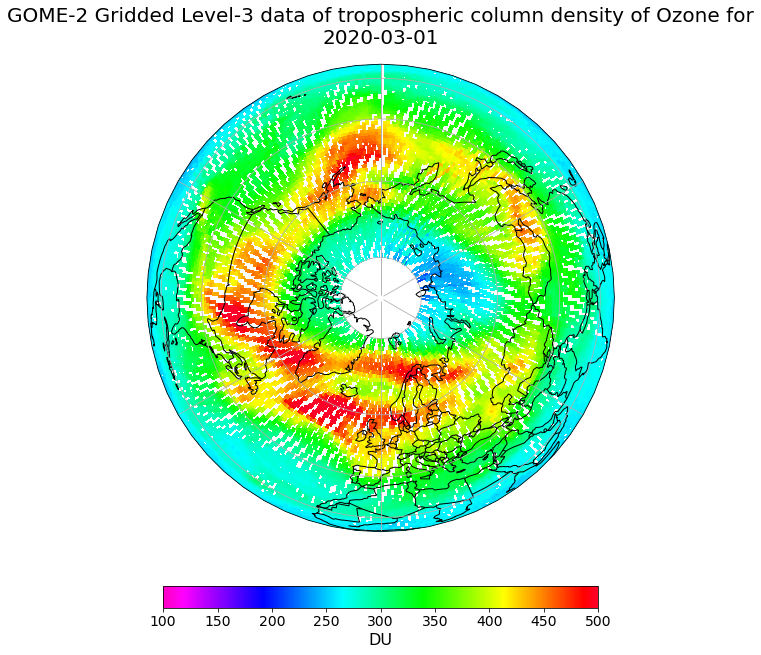

In [7]:
date0 = str(o3.time[0].data)[0:10]
title = 'GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for\n' + date0

fig, ax = visualize_pcolormesh(data_array=o3[0,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name=title, 
                     vmin=100, 
                     vmax=500)


# Define the number of frames (the number of days from 2nd March to 31st March).
frames = 30

# Define the animation function that updates the pcolormesh on the axis
def animate(i):
    date = str(o3.time[i].data)[0:10]
    
    img = ax.pcolormesh(o3.longitude_bins, o3.latitude_bins, o3[i,:,:], 
                        cmap=plt.get_cmap('gist_rainbow_r'), transform=ccrs.PlateCarree(),
                        vmin=100,
                        vmax=500,
                        shading='auto')
    ax.set_title('GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for\n' + date, fontsize=20, pad=20.0)
    
    return img


In [8]:
#Create a animate.FuncAnimation object
ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False, repeat=True)

plt.show(block = False)

# Play the animation as a video
HTML(ani.to_html5_video())

<br>

<br>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>